In [1]:
'''
tp = TextProcessor
# is, ASAP !!!!
df = tp.apply_contractions(df, col)
# is, AS SOON AS POSSIBLE !!!!
df = tp.remove_nonAlphanumeric(df, col)
# is  AS SOON AS POSSIBLE
df = tp.to_lower(df, col)
# is  as soon as possible
df = tp.apply_lemmatization(df, col)
# be  as soon as possible
df = tp.remove_stopwords(df, col)
#        soon    possible
df = tp.remove_extra_spaces(df, col)
# soon possible
# '''

# features + tfidf(ngram=(1,1)) + rating + tense + length + absolute_sentiment

'\ntp = TextProcessor\n# is, ASAP !!!!\ndf = tp.apply_contractions(df, col)\n# is, AS SOON AS POSSIBLE !!!!\ndf = tp.remove_nonAlphanumeric(df, col)\n# is  AS SOON AS POSSIBLE\ndf = tp.to_lower(df, col)\n# is  as soon as possible\ndf = tp.apply_lemmatization(df, col)\n# be  as soon as possible\ndf = tp.remove_stopwords(df, col)\n#        soon    possible\ndf = tp.remove_extra_spaces(df, col)\n# soon possible\n# '

In [2]:
from utils import DataLoader, Metrics 
from classifiers import RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost

In [3]:
data = DataLoader()
X_train, X_test, y_train, y_test = data.datasets

In [4]:
X_test.shape

(193, 268)

========================= DecisionTree =========================
Elapsed Time: 29.892 seconds
DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       min_samples_split=32)
Train Accuracy: 0.6575, F1: [0.6619 0.5738 0.6667 0.714 ]
Test  Accuracy: 0.544, F1: [0.6111 0.413  0.5618 0.5773]


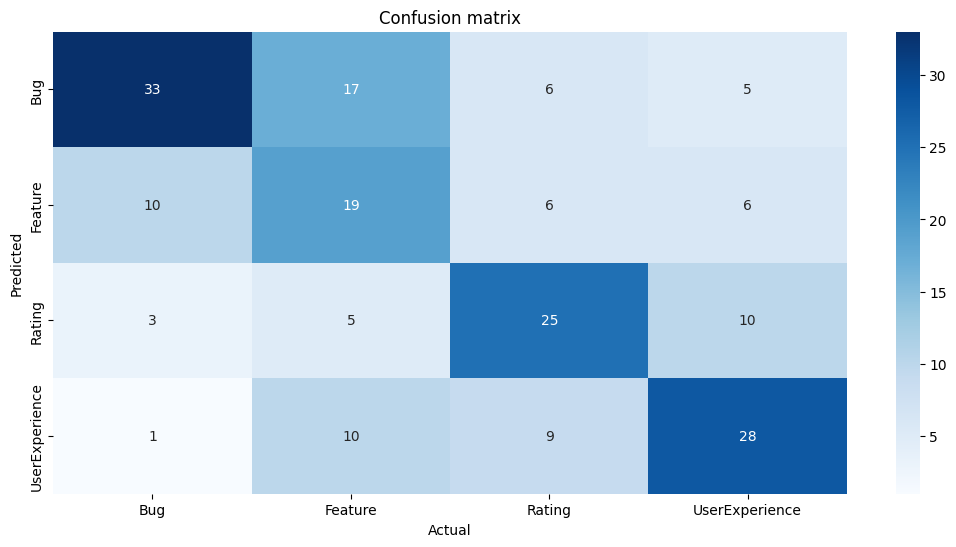

========================= LSVM =========================
Elapsed Time: 27.5247 seconds
LinearSVC(C=0.1, dual=False)
Train Accuracy: 0.7463, F1: [0.7621 0.6126 0.7581 0.8019]
Test  Accuracy: 0.6166, F1: [0.752  0.4308 0.5417 0.64  ]


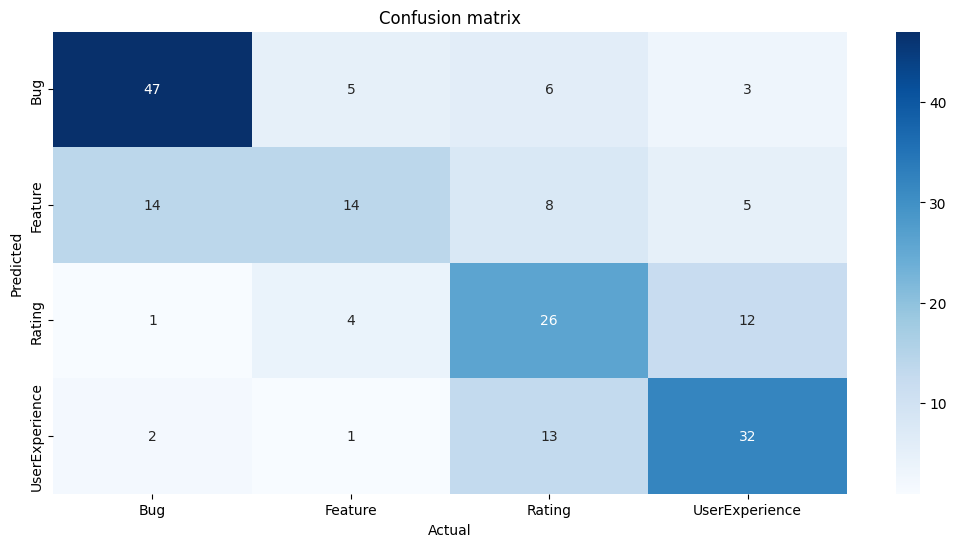

========================= RandomForest =========================
Elapsed Time: 42.5909 seconds
RandomForestClassifier(criterion='entropy', max_depth=41, min_samples_split=9,
                       n_estimators=200)
Train Accuracy: 0.9835, F1: [0.9882 0.9935 0.976  0.9782]
Test  Accuracy: 0.6373, F1: [0.6963 0.5294 0.5714 0.6869]


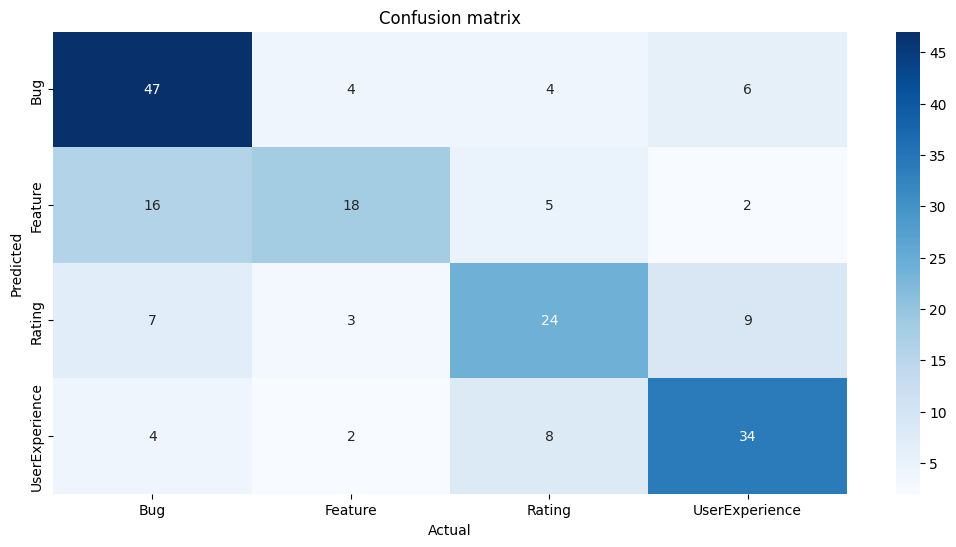

========================= AdaBoost =========================
Elapsed Time: 5.5652 seconds
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=10))
Train Accuracy: 0.9991, F1: [0.9983 1.     1.     0.9982]
Test  Accuracy: 0.5855, F1: [0.6435 0.439  0.5682 0.6535]


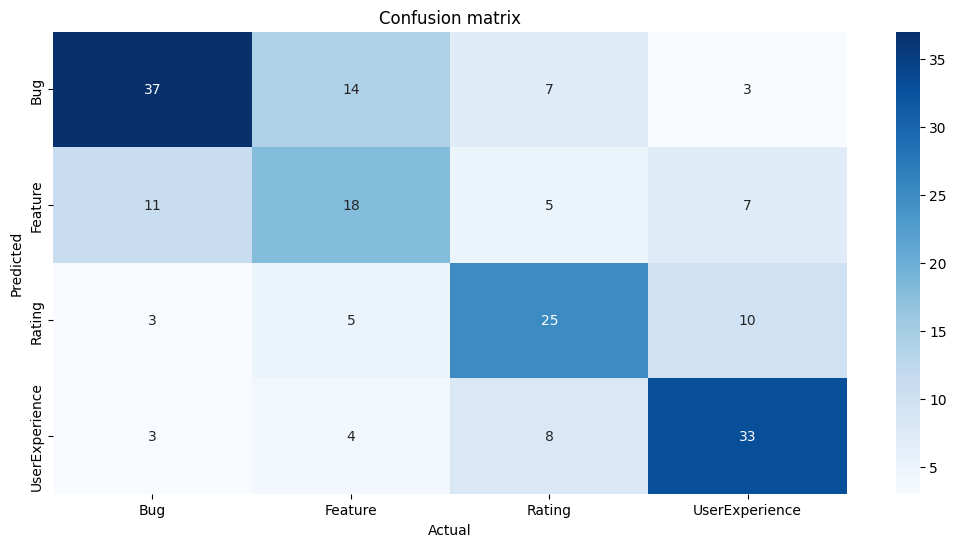

========================= XGBoost =========================
Elapsed Time: 69.7956 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7465286138284289, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.19348034274508746, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.20205910809367517, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=127, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
Train Accuracy: 0.9441, F1: [0.9613 0.9372 0.9368 0.9391]
Test  Accuracy: 0.6839, F1: [0.7395 0.5854 0.6437 0.7347]


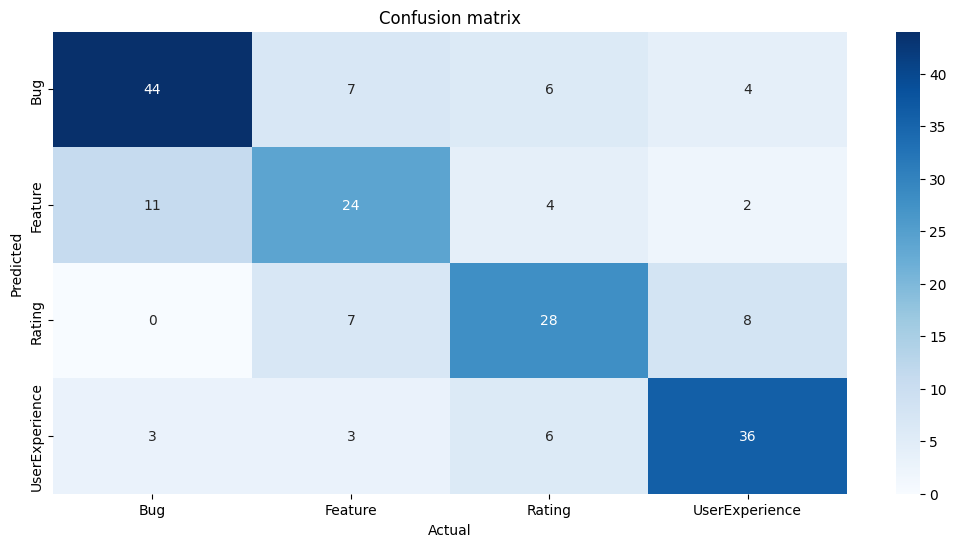

In [5]:
clfs = [DecisionTree, LSVM, RandomForest, AdaBoost, XGBoost]

for clf in clfs:
    print(f"========================= {clf.__name__} =========================")
    model = clf()
    model.model_selection(X_train, y_train)
    print(model.clf)

    Metrics.report(model, X_train, X_test, y_train, y_test)
    pred = model.predict(X_test)
    Metrics.plot_confusion_matrix(y_test, pred, data.labels)